# Unit 5 - Financial Planning

In [285]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from alpaca_trade_api.rest import REST, TimeFrame
from IPython.display import display
%matplotlib inline

In [286]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [287]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [288]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [289]:
# Fetch current BTC price
btc_price = requests.get(btc_url).json()
btc_price = btc_price['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_price = requests.get(eth_url).json()
eth_price = eth_price['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $49642.80
The current value of your 5.3 ETH is $15471.71


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [290]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [291]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("APCA_API_KEY_ID")
alpaca_secret_key = os.getenv("APCA_API_SECRET_KEY")
# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2'
)

In [292]:
# Format current date as ISO format
today = pd.Timestamp('2022-03-21', tz='America/New_York').isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]




In [293]:

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_ticker = api.get_bars(tickers, 
TimeFrame.Day, 
start= today, end=today, limit=1000).df
df_ticker.index = df_ticker.index.date
# Preview DataFrame
df_ticker

,open,high,low,close,volume,trade_count,vwap,symbol
2022-03-21,107.60,107.649,106.9841,107.04,7583668,27316,107.310151,AGG
2022-03-21,444.45,446.460,440.6800,444.39,85377983,912432,443.796432,SPY


In [294]:
#turn table into pivot table 
closes = df_ticker.pivot_table(values="close", index="timestamp", columns="symbol")
closes.head()

,close
symbol,444.39
timestamp,107.04


In [295]:
# Pick AGG and SPY close prices
agg_close_price = df_ticker.iloc[0,3]
spy_close_price = df_ticker.iloc[1,3]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $107.04
Current SPY closing price: $444.39


In [296]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22219.50
The current value of your 200 AGG shares is $21408.00


### Savings Health Analysis

In [297]:
# Set monthly household income
monthly_income = 12000 

# Consolidate financial assets data
crypto_sum = my_btc_value + my_eth_value 
shares_sum = my_spy_value + my_agg_value


In [298]:

# Create savings DataFrame
df_savings = pd.DataFrame([crypto_sum, shares_sum], 
columns=['amount'], 
index=['crypto','shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,65114.507
shares,43627.500


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

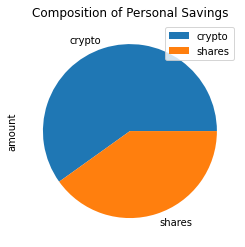

In [299]:
# Plot savings pie chart
df_savings.plot.pie(y='amount', title='Composition of Personal Savings')

In [300]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings['amount'].sum()

# Validate saving health
if total_savings > emergency_fund:
    print('Congratulations! You have enough money in your emergency fund.')
elif total_savings == emergency_fund:
    print('Congratulations! You have reached your financial goal.')
else:
    print('Sorry! You have not reached your goal.')

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [301]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [302]:
# Get 5 years' worth of historical data for AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
tickers = ["AGG"]
df_agg_data = api.get_bars(tickers,
TimeFrame.Day,
start=start_date,
end=end_date, limit=1000).df
df_agg_data.index = df_agg_data.index.date
df_agg_data = df_agg_data.reset_index()
# Display sample data
#turn table into pivot table 
df_agg_data = df_agg_data.pivot_table(values="close", index='index', columns="symbol")
df_agg_data.head()

symbol,AGG
index,
2016-05-02,110.605
2016-05-03,110.810
2016-05-04,110.860
2016-05-05,111.140
2016-05-06,110.970


In [303]:
# Get 5 years' worth of historical data for SPY 
# (use a limit=1000 parameter to call the most recent 1000 days of data)
tickers = ["SPY"]
df_spy_data = api.get_bars(tickers,
TimeFrame.Day,
start=start_date,
end=end_date, limit=1000).df
df_spy_data.index = df_spy_data.index.date
df_spy_data = df_spy_data.reset_index()
# Display sample data
df_spy_data = df_spy_data.pivot_table(values="close", index='index', columns="symbol")
df_spy_data.head()

symbol,SPY
index,
2016-05-02,207.9700
2016-05-03,206.1592
2016-05-04,205.0100
2016-05-05,204.9700
2016-05-06,205.7200


In [304]:
tradeapi = REST()

In [305]:
def get_company(ticker, start, end, tradeapi):
    return tradeapi.get_bars(
        ticker,
        TimeFrame.Day,
        start,
        end
    ).df

In [306]:
my_df = {
    "AGG":get_company("AGG", "2017-03-17", "2022-03-18", api),
    "SPY":get_company("SPY", "2017-03-17", "2022-03-18", api)
}

In [307]:
#Concat the two data sets
combined_stocks = pd.concat(my_df.values(), keys= my_df.keys(), axis='columns' )
combined_stocks

AGG                                       \
                             open     high       low   close    volume   
timestamp                                                                
2017-03-17 04:00:00+00:00  107.72  107.910  107.6901  107.88   2368799   
2017-03-20 04:00:00+00:00  107.86  108.050  107.8401  108.05   1635249   
2017-03-21 04:00:00+00:00  107.93  108.270  107.9300  108.27   2049680   
2017-03-22 04:00:00+00:00  108.44  108.540  108.3600  108.42   2643641   
2017-03-23 04:00:00+00:00  108.44  108.510  108.2635  108.45   2071485   
...                           ...      ...       ...     ...       ...   
2022-03-14 04:00:00+00:00  107.78  107.816  107.3600  107.36   9492508   
2022-03-15 04:00:00+00:00  107.83  107.920  107.4300  107.60  13841071   
2022-03-16 04:00:00+00:00  107.63  107.730  107.0032  107.68  15809171   
2022-03-17 04:00:00+00:00  107.87  108.060  107.7300  107.86   8005258   
2022-03-18 04:00:00+00:00  107.95  108.140  107.9203  108.10   7800354   

                                                       SPY                  \
                          trade_count        vwap     open    high     low   
timestamp                                                                    
2017-03-17 04:00:00+00:00       10846  107.859402  237.790  237.97  237.03   
2017-03-20 04:00:00+00:00        8198  107.961544  237.030  237.36  236.32   
2017-03-21 04:00:00+00:00       12024  108.175725  237.490  237.61  233.58   
2017-03-22 04:00:00+00:00       11111  108.455049  233.780  234.61  233.05   
2017-03-23 04:00:00+00:00       10901  108.417635  234.010  235.34  233.60   
...                               ...         ...      ...     ...     ...   
2022-03-14 04:00:00+00:00       34364  107.571987  420.975  424.55  415.79   
2022-03-15 04:00:00+00:00       33852  107.622094  419.900  426.84  418.42   
2022-03-16 04:00:00+00:00       43366  107.553629  429.940  435.68  424.80   
2022-03-17 04:00:00+00:00       24093  107.889900  433.700  441.07  433.19   
2022-03-18 04:00:00+00:00       23567  108.060585  438.200  444.86  437.22   

                                                                        
                              close     volume trade_count        vwap  
timestamp                                                               
2017-03-17 04:00:00+00:00  237.1008   89002111      225269  237.526209  
2017-03-20 04:00:00+00:00  236.7400   52536979      169612  236.909398  
2017-03-21 04:00:00+00:00  233.7600  131809275      443599  234.853857  
2017-03-22 04:00:00+00:00  234.2500   97569204      307469  233.932509  
2017-03-23 04:00:00+00:00  233.9400  100410277      333903  234.388790  
...                             ...        ...         ...         ...  
2022-03-14 04:00:00+00:00  417.0000   91930409      863515  419.203845  
2022-03-15 04:00:00+00:00  426.1700  104219651      920659  422.752423  
2022-03-16 04:00:00+00:00  435.6200  138130298     1344164  431.339744  
2022-03-17 04:00:00+00:00  441.0700  100157174      784018  437.706981  
2022-03-18 04:00:00+00:00  444.5200  102327793      790235  441.458916  

[1261 rows x 14 columns]

In [308]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
thirty_years = MCSimulation(portfolio_data= combined_stocks,
weights=[.50, .50],
num_simulation= 1000,
num_trading_days= 252*30
)

In [309]:
# Printing the simulation input data
thirty_years

In [310]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
thirty_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\krist\OneDrive\Desktop\api-homework05\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008705,1.006434,0.985702,1.002083,1.008629,1.000093,0.988930,0.999756,1.004274,0.995735,...,0.992052,0.999831,0.991293,0.996994,0.998893,1.003947,0.998993,1.002310,1.004459,1.005129
2,1.012638,1.004682,0.981383,1.012607,0.999159,1.004278,0.985796,1.006020,1.003194,1.008020,...,1.003490,0.999392,0.992806,0.993087,0.997431,0.995790,0.998838,1.013620,1.001727,0.996682
3,1.020535,1.008275,0.972771,1.024833,0.995331,0.996131,0.996548,0.998908,1.001016,1.015682,...,1.006283,0.998732,0.987443,0.994735,1.002251,1.004421,1.001174,1.009431,1.015649,0.988957
4,1.030559,1.005550,0.987262,1.019198,1.000967,0.990381,0.985448,1.002434,1.007185,1.015801,...,1.009936,0.994591,0.992572,0.996865,0.998745,0.999471,1.004335,1.006845,1.005622,0.980266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.173838,7.220339,11.846419,5.879708,5.700859,6.984180,6.101251,3.393113,13.156397,8.635503,...,7.654723,2.724640,7.565425,5.300377,4.836678,7.936534,8.981631,6.598568,3.747654,4.409392
7557,5.119056,7.145852,11.845985,5.847491,5.716410,6.998330,6.093346,3.425579,13.159075,8.627481,...,7.595633,2.732164,7.522330,5.296101,4.798908,7.913744,8.960619,6.538623,3.744545,4.412994
7558,5.152491,7.173908,11.840286,5.860275,5.709400,6.973003,6.096078,3.435738,13.230175,8.704128,...,7.561562,2.758850,7.545609,5.298205,4.831971,7.845102,8.942428,6.506749,3.775740,4.433790
7559,5.093532,7.132923,11.774671,5.814679,5.712797,6.955392,6.151817,3.434682,13.233379,8.662390,...,7.599557,2.781555,7.534123,5.244668,4.841421,7.850673,8.905355,6.483097,3.753684,4.418946


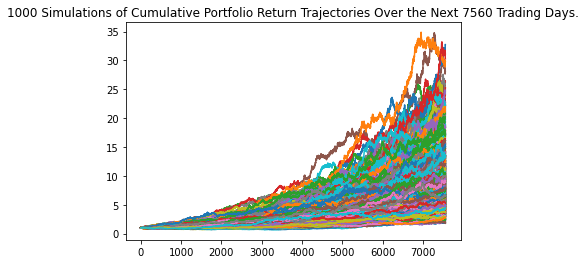

In [311]:
# Plot simulation outcomes
line_plot = thirty_years.plot_simulation()

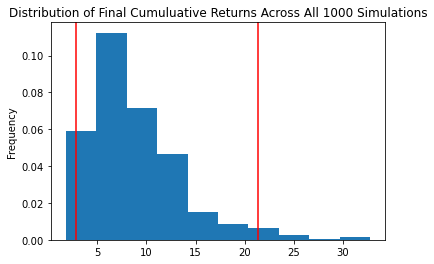

In [312]:
# Plot probability distribution and confidence intervals
dist_plot = thirty_years.plot_distribution()

### Retirement Analysis

In [313]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats = thirty_years.summarize_cumulative_return()

# Print summary statistics
print(summary_stats)

count           1000.000000
mean               8.748873
std                4.644179
min                1.799858
25%                5.541962
50%                7.688277
75%               11.007671
max               32.753957
95% CI Lower       2.828521
95% CI Upper      21.397630
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [314]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_stats[8]*20000*2)
ci_upper = round(summary_stats[9]*20000*2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $113141 and $855905


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [315]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary_stats[8]*30000*2)
ci_upper = round(summary_stats[9]*30000*2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $169711 and $1283858
